# Vector similarity spaces

Let's compare the vector embeddings from different models. We will use the following models:

- Word2Vec, trained on the Google News dataset
- OpenAI text-embedding-ada002
- OpenAI text-embedding-3-small


In [1]:
# Load in vectors from openai and googlenews
import json

with open('embeddings/words_word2vec-google-news.json') as f:
    vectors_w2vec = json.load(f)
    
with open('embeddings/words_text-embedding-ada-002.json') as f:
    vectors_ada2 = json.load(f)

with open('embeddings/words_text-embedding-3-small-1536.json') as f:
    vectors_emb3 = json.load(f)

vectors_w2vec["queen"]

[0.0052490234375,
 -0.1435546875,
 -0.0693359375,
 0.12353515625,
 0.1318359375,
 -0.0888671875,
 -0.0712890625,
 -0.216796875,
 -0.197265625,
 0.0556640625,
 -0.07568359375,
 -0.380859375,
 0.10400390625,
 -0.00081634521484375,
 0.1328125,
 0.11279296875,
 0.07275390625,
 -0.046875,
 0.06591796875,
 0.09423828125,
 0.1904296875,
 0.13671875,
 -0.236328125,
 -0.11865234375,
 0.0654296875,
 -0.05322265625,
 -0.30859375,
 0.091796875,
 0.1884765625,
 -0.1669921875,
 -0.15625,
 -0.130859375,
 -0.08251953125,
 0.212890625,
 -0.35546875,
 -0.1318359375,
 0.09619140625,
 0.263671875,
 -0.0947265625,
 0.18359375,
 0.10693359375,
 -0.416015625,
 0.26953125,
 -0.0277099609375,
 0.17578125,
 -0.11279296875,
 -0.004119873046875,
 0.1455078125,
 0.15625,
 0.267578125,
 -0.0179443359375,
 0.0986328125,
 0.052978515625,
 -0.03125,
 -0.1630859375,
 -0.05810546875,
 -0.34375,
 -0.1728515625,
 0.1142578125,
 -0.09033203125,
 0.134765625,
 0.279296875,
 -0.0498046875,
 0.1298828125,
 0.17578125,
 -0.221

In [33]:
vectors_emb3["queen"]

[0.04379640519618988,
 -0.03982372209429741,
 0.044741131365299225,
 0.02169230207800865,
 -0.004817483481019735,
 -0.012123949825763702,
 -0.01251152902841568,
 0.02121994085609913,
 -0.049101389944553375,
 0.013262462802231312,
 0.016084520146250725,
 0.02693672850728035,
 -0.033961594104766846,
 -0.005071832332760096,
 0.015248804353177547,
 0.046121880412101746,
 -0.01753794215619564,
 0.0036880546249449253,
 0.04437777400016785,
 0.04081689566373825,
 0.014558428898453712,
 -0.005541165824979544,
 0.021062485873699188,
 -0.019851302728056908,
 0.03863676264882088,
 0.029407542198896408,
 -0.013141344301402569,
 0.014449423179030418,
 0.00922316499054432,
 -0.0469454824924469,
 0.04050198569893837,
 -0.02574976719915867,
 0.05687719210982323,
 -0.001380749512463808,
 -0.00046592726721428335,
 -0.015696942806243896,
 -0.018458440899848938,
 -0.05857284739613533,
 0.006788685452193022,
 0.004320898093283176,
 0.0208686962723732,
 -0.03195102885365486,
 0.0031157704070210457,
 0.03090

In [2]:
import matplotlib.pyplot as plt


def render_vector(vector):
    """Visualize the values of the vector in a bar chart"""
    plt.bar(range(len(vector)), vector)
    plt.xlabel('Dimension')
    plt.ylabel('Value')
    plt.title('Vector')
    plt.show()

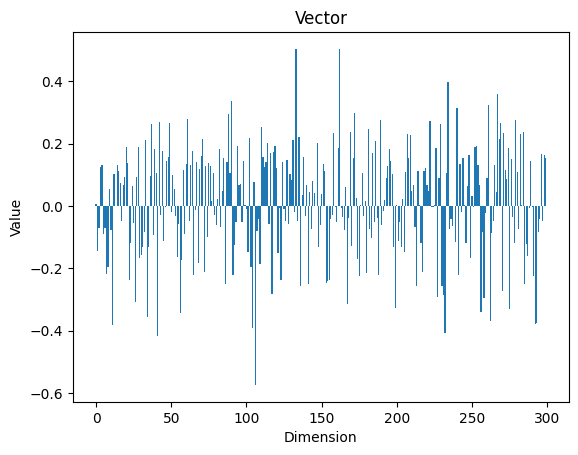

In [15]:
render_vector(vectors_w2vec['queen'])

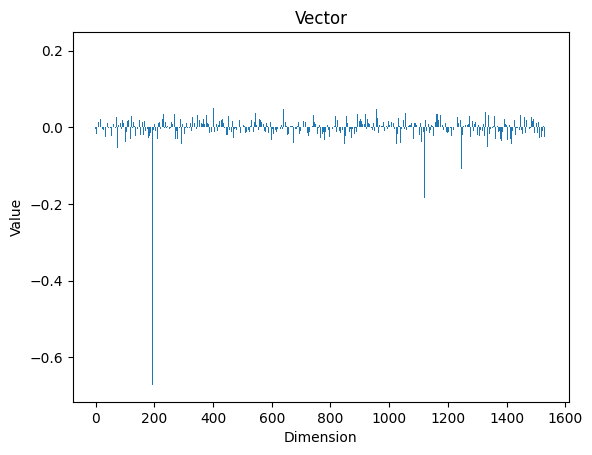

In [16]:
render_vector(vectors_ada2['queen'])

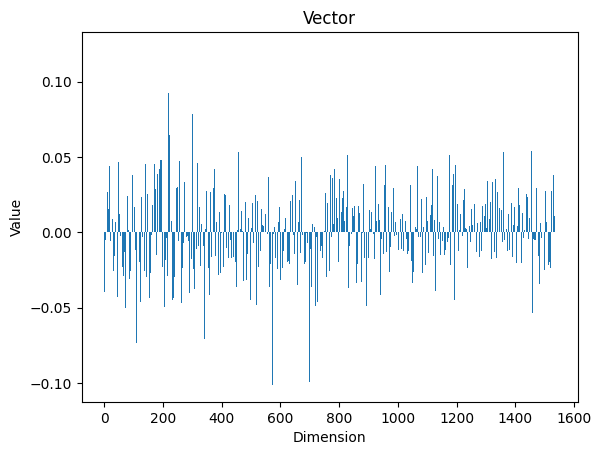

In [35]:
render_vector(vectors_emb3['queen'])

## Visualizations with dimensionality reduction

In [17]:
import numpy as np
from sklearn.decomposition import PCA


def perform_pca(vectors: dict):
    """Perform PCA on the word vectors and return the PCA-transformed vectors"""
    X = np.array(list(vectors.values()))
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X)
    X_pca = {list(vectors.keys())[i]: X_pca[i] for i in range(len(vectors))}
    return X_pca


vectors_wvec_pca = perform_pca(vectors_w2vec)
vectors_ada2_pca = perform_pca(vectors_ada2)
vectors_emb3_pca = perform_pca(vectors_emb3)

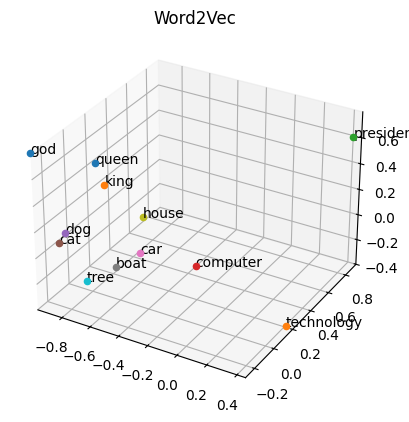

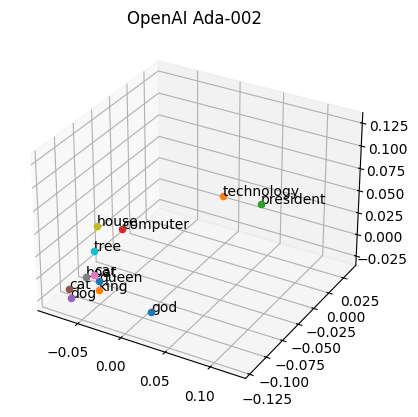

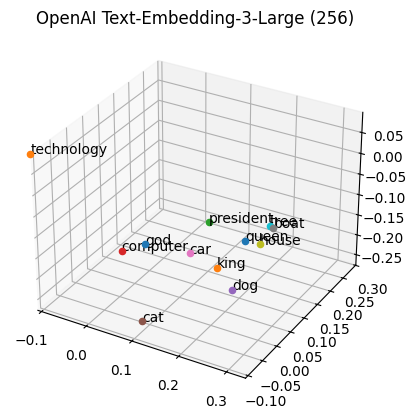

In [18]:
def render_vectors_3d(vectors: dict, title: str):
    """Render 3-dimensional vectors (key: [,,,]) in a 3D plot"""
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # Plot the vectors as points
    for key, vector in vectors.items():
        ax.scatter(vector[0], vector[1], vector[2])
        ax.text(vector[0], vector[1], vector[2], key)

    # Figure out the max and min values for each dimension
    min_x = min(v[0] for v in vectors.values())
    max_x = max(v[0] for v in vectors.values())
    min_y = min(v[1] for v in vectors.values())
    max_y = max(v[1] for v in vectors.values())
    min_z = min(v[2] for v in vectors.values())
    max_z = max(v[2] for v in vectors.values())
    ax.set_xlim([min_x, max_x])
    ax.set_ylim([min_y, max_y])
    ax.set_zlim([min_z, max_z])
    ax.set_title(title)
    plt.show()


# Get subset of the vectors for plotting
words = ['queen', 'king', 'president', 'computer', 'dog', 'cat', 'car', 'boat', 'house', 'tree', 'god', 'technology']
word_pca_vectors_wvec = {word: vectors_wvec_pca[word] for word in words}
word_pca_vectors_ada2 = {word: vectors_ada2_pca[word] for word in words}
word_pca_vectors_emb3 = {word: vectors_emb3_pca[word] for word in words}

# Plot the vectors
render_vectors_3d(word_pca_vectors_wvec, 'Word2Vec')
render_vectors_3d(word_pca_vectors_ada2, 'OpenAI Ada-002')
render_vectors_3d(word_pca_vectors_emb3, 'OpenAI Text-Embedding-3-Large (256)')

In [ ]:
import pandas as pd

def cosine_similarity(v1, v2):
    """Compute the cosine similarity between two vectors"""
    dot_product = sum([a * b for a, b in zip(v1, v2)])
    magnitude = (sum([a**2 for a in v1]) * sum([a**2 for a in v2])) ** 0.5
    return dot_product / magnitude

def most_similar(word: str, vectors: dict) -> list[list]:
    """Return the 10 most similar words and similarities to the given word"""
    word_vector = vectors[word]
    similarities = {w: cosine_similarity(word_vector, vector) for w, vector in vectors.items()}
    most_similar_words = sorted(similarities, key=similarities.get, reverse=True)
    return pd.DataFrame([(word, similarities[word]) for word in most_similar_words[:10]], columns=['word', 'similarity'])

word = 'dog'
most_similar(word, vectors_w2vec)

,word,similarity
0,dog,1.000000
1,cat,0.760946
2,animal,0.643801
3,horse,0.482581
4,bird,0.450441
5,child,0.370100
6,baby,0.356009
7,boy,0.352168
8,woman,0.351105
9,mother,0.345503


In [22]:
most_similar(word, vectors_ada2)

,word,similarity
0,dog,1.000000
1,animal,0.885472
2,god,0.865986
3,cat,0.863493
4,fish,0.856640
5,bird,0.855640
6,diet,0.852973
7,horse,0.852069
8,drug,0.850611
9,gun,0.849355


In [23]:
most_similar(word, vectors_emb3)

,word,similarity
0,dog,1.000000
1,animal,0.661903
2,cat,0.650214
3,car,0.618528
4,horse,0.592711
5,boat,0.573667
6,dad,0.565426
7,post,0.544029
8,girl,0.543078
9,man,0.541027


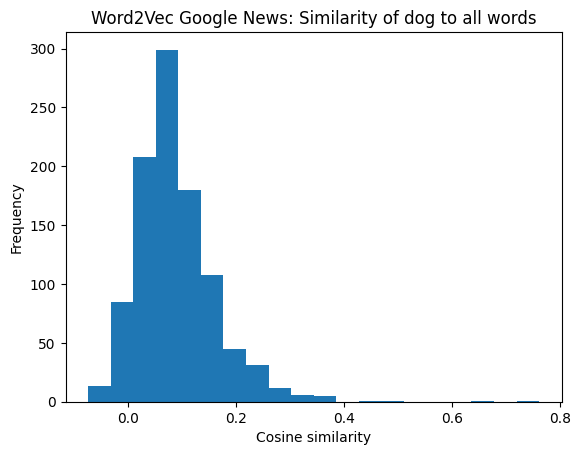

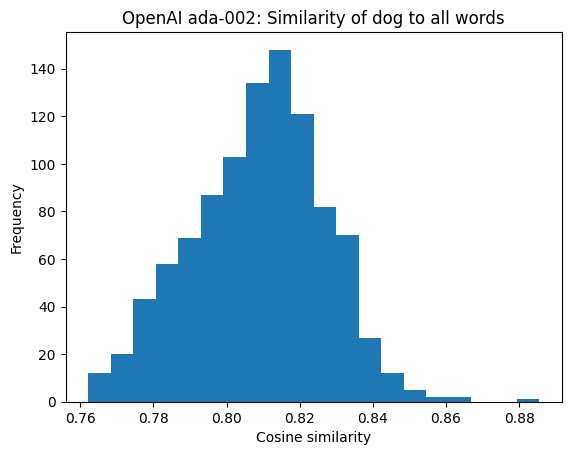

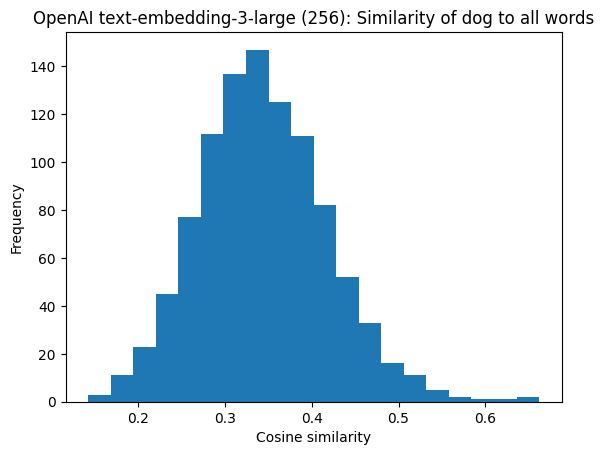

In [27]:
def cosine_similarity_histogram(word: str, vectors: dict, model_name: str):
    """Plot a histogram of the cosine similarities of the word to all other words"""
    word_vector = vectors[word]
    similarities = [cosine_similarity(word_vector, vectors[w]) for w in vectors if w != word]
    plt.hist(similarities, bins=20)
    plt.xlabel('Cosine similarity')
    plt.ylabel('Frequency')
    plt.title(f'{model_name}: Similarity of {word} to all words')
    plt.show()

cosine_similarity_histogram('dog', vectors_w2vec, 'Word2Vec Google News')
cosine_similarity_histogram('dog', vectors_ada2, 'OpenAI ada-002')
cosine_similarity_histogram('dog', vectors_emb3, 'OpenAI text-embedding-3-large (256)')

## Explore multi-word vectors

In [2]:
import json

with open('embeddings/movies_text-embedding-3-small-1536.json') as f:
    movies = json.load(f)

In [51]:
# Find the 10 most similar movies to a target movie
target_movie = movies['101 Dalmatians']

# Calculate the cosine similarity between the target movie and all other movies
similarities = [cosine_similarity(target_movie, movie) for movie in movies.values()]

most_similar = sorted(range(len(similarities)), key=lambda i: similarities[i], reverse=True)[1:11]

similar_movies = [(list(movies.keys())[i], round(similarities[i], 3)) for i in most_similar]
pd.DataFrame(similar_movies, columns=['movie', 'similarity'])

,movie,similarity
0,102 Dalmatians,0.887
1,The Aristocats,0.540
2,Snow Dogs,0.478
3,Beverly Hills Chihuahua,0.456
4,The Fox and the Hound,0.449
5,Old Dogs,0.442
6,The Rescuers,0.438
7,That Darn Cat,0.431
8,Lady and the Tramp,0.427
9,The Rescuers Down Under,0.425


In [52]:
# Display the 10 least similar movies
least_similar = sorted(range(len(similarities)), key=lambda i: similarities[i])[1:11]
similar_movies = [(list(movies.keys())[i], round(similarities[i], 3)) for i in least_similar]
pd.DataFrame(similar_movies, columns=['movie', 'similarity'])

,movie,similarity
0,Mumford,0.079
1,Renaissance Man,0.080
2,Phenomenon,0.083
3,Hauru no ugoku shiro,0.089
4,Jefferson in Paris,0.092
5,Hidalgo,0.095
6,Son in Law,0.095
7,Medicine Man,0.104
8,Haakon Haakonsen,0.105
9,Un indien dans la ville,0.107


## Resources

* [Embedding projector](https://projector.tensorflow.org/)
* [Why are Cosine Similarities of Text embeddings almost always positive?](https://vaibhavgarg1982.medium.com/why-are-cosine-similarities-of-text-embeddings-almost-always-positive-6bd31eaee4d5)
* [Expected Angular Differences in Embedding Random Text?](https://community.openai.com/t/expected-angular-differences-in-embedding-random-text/28577)
* [Embeddings: What they are and why they matter](https://simonwillison.net/2023/Oct/23/embeddings/)
